<h1><bold>CS374 - Computational and Numerical Methods Lab 3</bold></h1>

```
Vraj Gandhi        -  202201425
Kaushik Prajapati  -  202201472
```

<h2>Newton-Raphson Method:</h2>
<p> Basic library importing for ploting, styling and table creation.

In [2]:
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<p align='justify'> Implementing polynomial class with root finding algorithm. It has a function named 'find_roots' and 'plot' to find the root of the polynomial and plot the graph of the function. Internally it has implementation of different root finding methods like bisection method and newton-rapson method. Also the function prints the calculation table for better clarification.

In [3]:
class polynomial:

    def __init__(self, function, accuracy = 1e-9) -> None:
        self.function = function
        self.epsilon = accuracy

    def method_of_bisection(self, low, high, table=True):

        lval = self.function(low)
        hval = self.function(high)

        if lval * hval > 0:
            print(f"No root between {low} and {high}")
            return None

        data = []
        index = 1
        while (high-low) >= self.epsilon:

            mid = (low + high) / 2
            lval = self.function(low)
            mval = self.function(mid)
            hval = self.function(high)
            data_element = [index, low, high, mid, high-mid, mval]
            index += 1
            if lval * mval <= 0:
                high = mid
            elif mval * hval <= 0:
                low = mid
            else:
                return None
            data.append(data_element)
        self.df = pd.DataFrame(data, columns = ["Index", "An", "Bn", "C", "Bn-C", "F(C)"])
        if table:
            print("Calculation Table:\n")
            display(self.df)
        return (low + high) / 2

    def newton_rapson_method(self, Xo, table=True):

        h = 1e-4
        Yo = self.function(Xo)
        Yo_prime = (self.function(Xo + h) - self.function(Xo))/h
        X1 = Xo - Yo/Yo_prime

        data = [[0, Xo, Yo, None, X1]]
        index = 1

        while abs(X1-Xo) >= self.epsilon:

            prev_X = Xo
            Xo = X1
            Yo = self.function(Xo)
            Yo_prime = (self.function(Xo + h) - self.function(Xo))/h
            X1 = Xo - Yo/Yo_prime

            data_elements = [index, Xo, Yo, Xo-prev_X, X1]
            data.append(data_elements)
            index += 1

        self.df = pd.DataFrame(data, columns = ["Index", "Xn", "F(Xn)", "Xn - Xn-1", "Xn+1"])
        if table:
            print("Calculation Table:\n")
            display(self.df)
        return X1


    def find_roots(self, a, b=0, method = 'None', table=True):

        root = None
        match method:
            case "bisect":
                root = self.method_of_bisection(a, b, table=table)
            case "newton":
                root = self.newton_rapson_method(a, table=table)
            case _:
                root = self.newton_rapson_method(a, table=table)
        if root is None:
            return None
        return np.round(root, 8)

    def plot(self, low=-10, high=10, xlimit = (-10, 10), ylimit = (-10, 10), figno=1):

        x = np.arange(low, high, 0.01)
        y = self.function(x)

        plt.figure(figno)
        plt.plot(x, y, label="y = f(x)")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.xlim(xlimit)
        plt.ylim(ylimit)
        plt.title("Plot for the function y = f(x)")
        plt.grid()
        plt.show()

    def converence_plot(self, root, xlimit = (-10, 10), ylimit = (-10, 10)):

        print("Convergence plot of the root:")
        iterations = np.array(self.df.index)
        points = np.array(self.df["Xn"])
        _root = [root for i in range(len(points))]
        plt.plot(iterations, points, label='Points v/s iterations')
        plt.plot(iterations, _root, label='y = root')
        plt.xlabel('Iterations')
        plt.ylabel('Xn Points')
        plt.title('Xn v/s Iteration')
        plt.grid()
        plt.legend()
        plt.show()


<h3>Question-1</h3>
Write a code, applying the algorithm of the Newton-Raphson method to
determine both the real roots of $f(x)= x^{6} - x - 1 = 0 .$

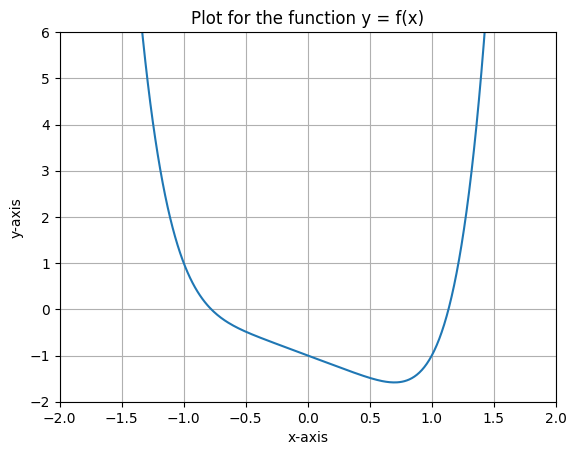

Calculation Table:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  1.000000 -1.000000        NaN  1.199940
1      1  1.199940  0.785148   0.199940  1.143573
2      2  1.143573  0.093005  -0.056367  1.134911
3      3  1.134911  0.001928  -0.008662  1.134724

Convergence plot of the root:


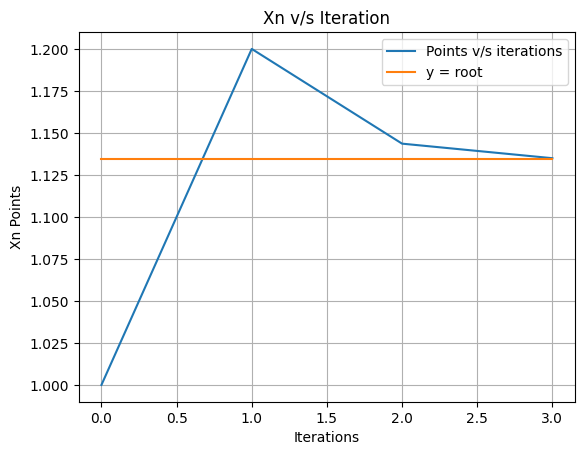


First Root = 1.13472427


In [4]:
p = polynomial(function = lambda x: x**6 - x - 1, accuracy=0.001)
p.plot(xlimit=(-2, 2), ylimit=(-2, 6))
root1 = p.find_roots(a=1, method='newton')
p.converence_plot(root=root1, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nFirst Root = {root1}")

Calculation Table:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  0.500000 -1.484375        NaN -1.327134
1      1 -1.327134  5.790856  -1.827134 -1.101782
2      2 -1.101782  1.890633   0.225352 -0.925735
3      3 -0.925735  0.555127   0.176047 -0.816420
4      4 -0.816420  0.112548   0.109316 -0.780978
5      5 -0.780978  0.007878   0.035441 -0.778106
6      6 -0.778106  0.000044   0.002872 -0.778090

Convergence plot of the root:


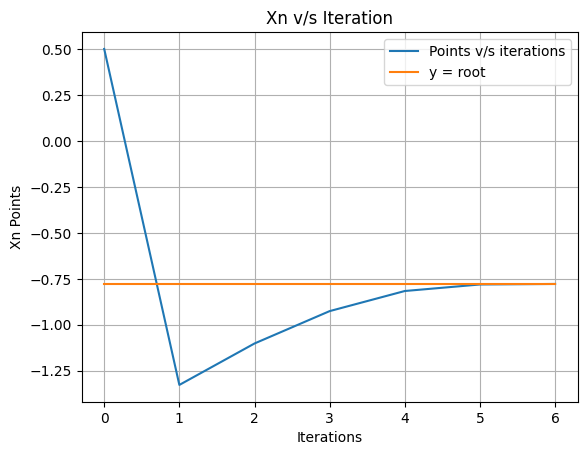


Second Root = -0.7780896


In [4]:
root2 = p.find_roots(a=0.5, method='newton')
p.converence_plot(root=root2, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nSecond Root = {root2}")

<h3>Question - 2, 3</h3>
2.1 Numerically implement the newton-rapson algorithm to find the roots of the following equations. Use an error tolerance of 0.0001. Numerically test the convergence of the problem given in Question 2 in the theory exercises on the Newton-Raphson method.


(a) The real root of $x^{3}-x^{2}-x-1$

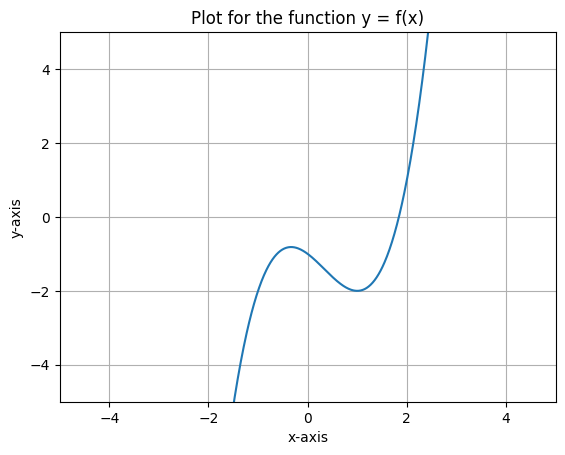

Calculation Table:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  1.250000  -1.859375        NaN  2.815427
1      1  2.815427  10.574789   1.565427  2.198813
2      2  2.198813   2.597184  -0.616614  1.913636
3      3  1.913636   0.432103  -0.285177  1.843481
4      4  1.843481   0.023022  -0.070156  1.839302
5      5  1.839302   0.000081  -0.004179  1.839287

Convergence plot of the root:


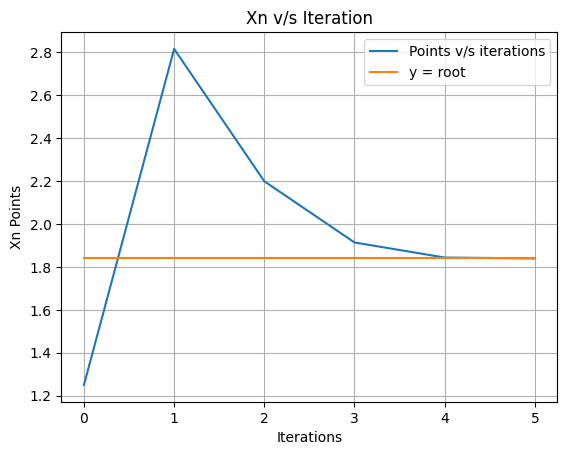


Root = 1.83928676


In [5]:
p = polynomial(function = lambda x: x**3 - x**2 - x - 1, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a = 1.25, method='newton')
p.converence_plot(root=root, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nRoot = {root}")

(b) The real root of $x = 1 + 0.3cos(x)$

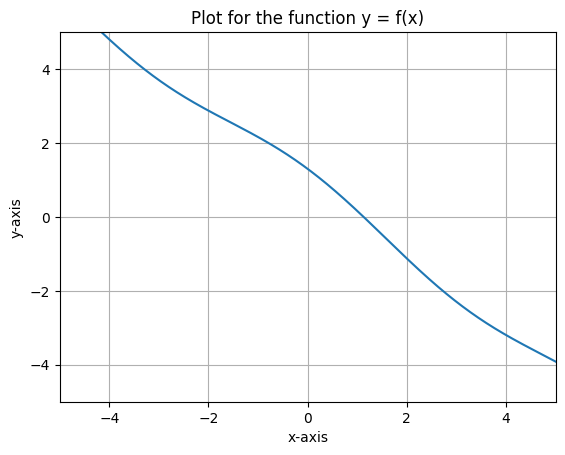

Calculation Table:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  2.875156        NaN  1.953710
1      1  1.953710 -1.065798   3.953710  1.119928
2      2  1.119928  0.010796  -0.833782  1.128429
3      3  1.128429 -0.000005   0.008501  1.128425

Convergence plot of the root:


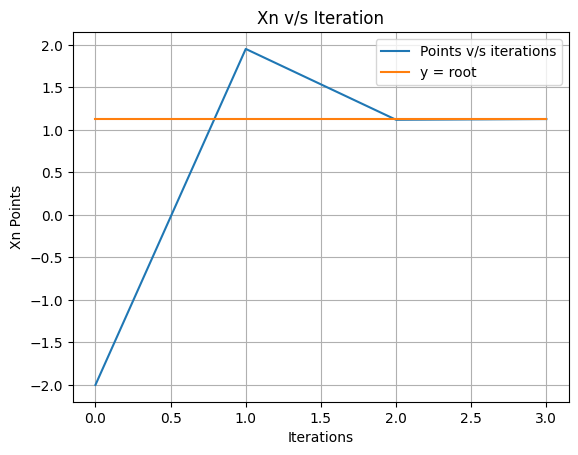


Root = 1.12842509


In [6]:
p = polynomial(function = lambda x: 1 + 0.3 * np.cos(x)-x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=-2, method='newton')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(c) The smallest positive root of $cos(x) = \frac{1}{2} + sin(x)$

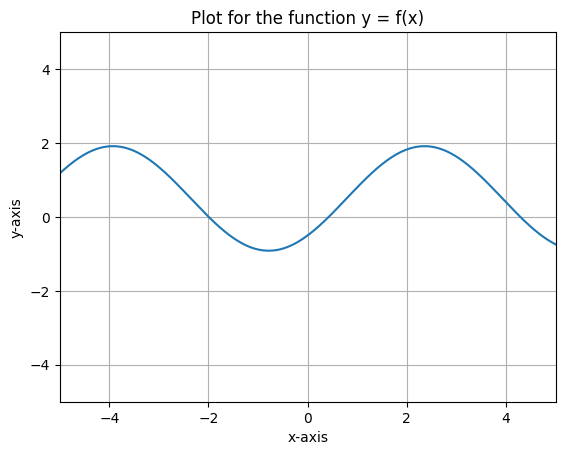

Calculation Table:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0  0.000000 -5.000000e-01        NaN  0.499975
1      1  0.499975  1.018091e-01   0.499975  0.424951
2      2  0.424951  1.217079e-03  -0.075024  0.424031
3      3  0.424031  2.340478e-07  -0.000920  0.424031

Convergence plot of the root:


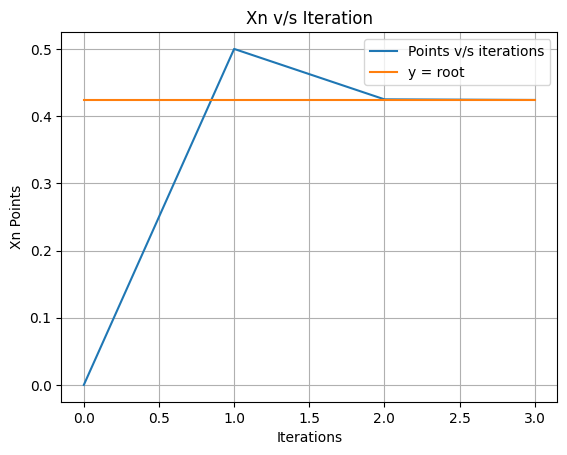


Root = 0.42403104


In [7]:
p = polynomial(function = lambda x: 0.5 + np.sin(x) - np.cos(x), accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=0, method='newton')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(d) The root of $x = e^{-x}$.

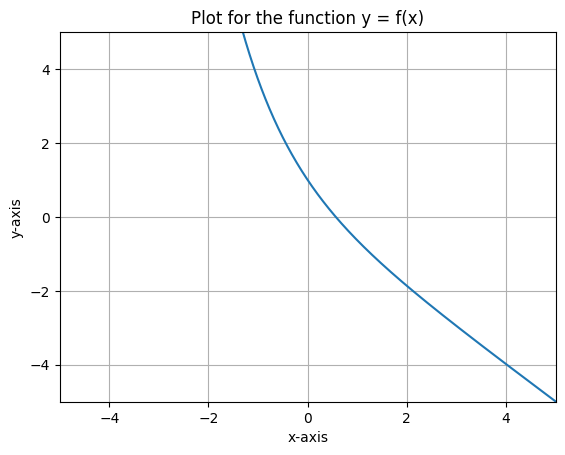

Calculation Table:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  9.389056e+00        NaN -0.880748
1      1 -0.880748  3.293451e+00   1.119252  0.084343
2      2  0.084343  8.347735e-01   0.965090  0.519331
3      3  0.519331  7.558707e-02   0.434989  0.566725
4      4  0.566725  6.562903e-04   0.047393  0.567143
5      5  0.567143  3.785434e-08   0.000419  0.567143

Convergence plot of the root:


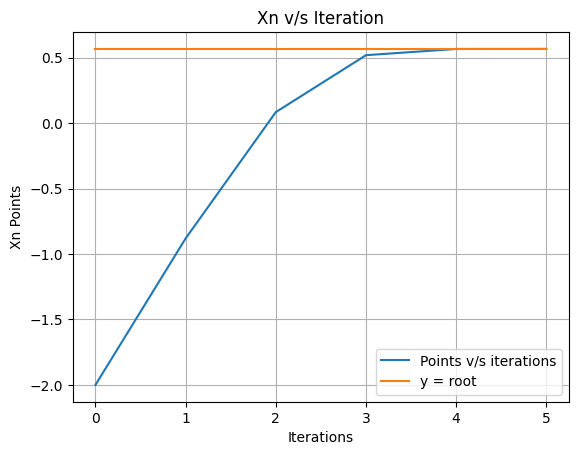


Root = 0.56714329


In [8]:
p = polynomial(function = lambda x: np.exp(-x) - x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=-2, method='newton')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(e) The smallest positive root of $e^{-x} = sin(x)$.

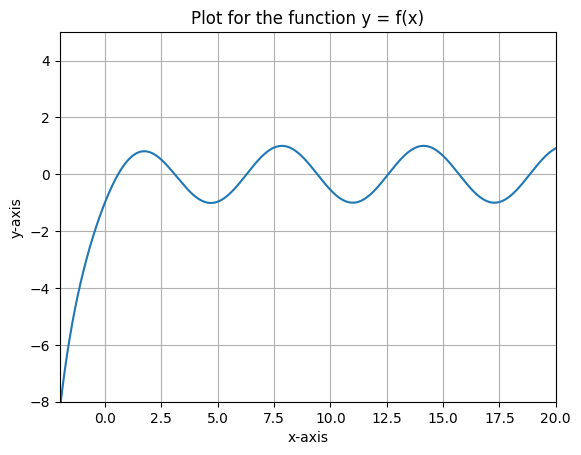

Calculation Table:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0  1.200000  6.308449e-01        NaN  0.249203
1      1  0.249203 -5.327908e-01  -0.950797  0.553919
2      2  0.553919 -4.866876e-02   0.304717  0.588070
3      3  0.588070 -6.418293e-04   0.034151  0.588533
4      4  0.588533 -9.312508e-08   0.000463  0.588533

Convergence plot of the root:


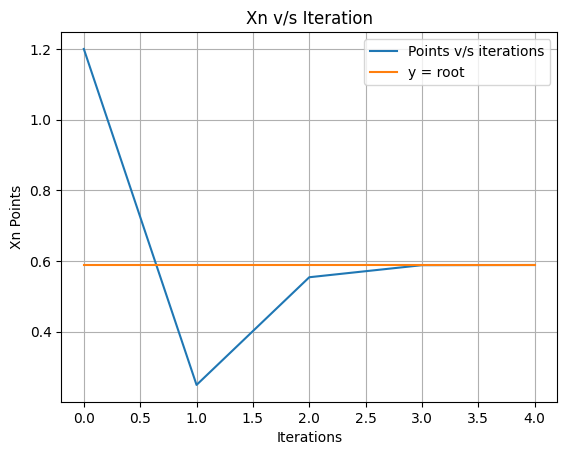


Root = 0.58853274


In [9]:
p = polynomial(function = lambda x: np.sin(x) - np.exp(-x), accuracy=0.0001)
p.plot(high=20, xlimit=(-2, 20), ylimit=(-8, 5))
root = p.find_roots(a=1.2, method='newton')
p.converence_plot(root=root, xlimit=(-2, 20), ylimit=(-8, 5))
print(f"\nRoot = {root}")

(f) The real root of $x^{3}-2x-2=0$.

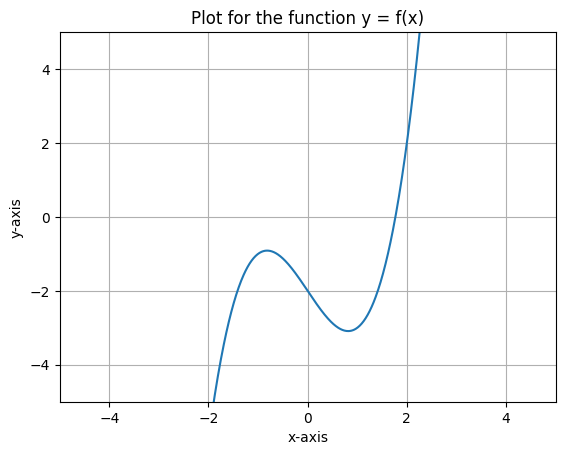

Calculation Table:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  1.000000  -3.000000        NaN  3.999100
1      1  3.999100  53.958621   2.999100  2.825567
2      2  2.825567  14.907699  -1.173534  2.146472
3      3  2.146472   3.596590  -0.679094  1.842261
4      4  1.842261   0.567975  -0.304211  1.772846
5      5  1.772846   0.026334  -0.069415  1.769302
6      6  1.769302   0.000069  -0.003545  1.769292

Convergence plot of the root:


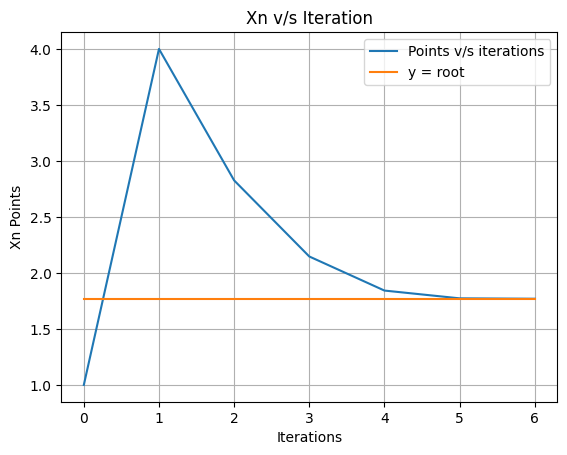


Root = 1.76929235


In [10]:
p = polynomial(function = lambda x: x**3 - 2*x - 2, accuracy=0.0001)
p.plot(high=20, xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=1, method='newton')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(g) All real roots of $x^{4}-x-1=0$.

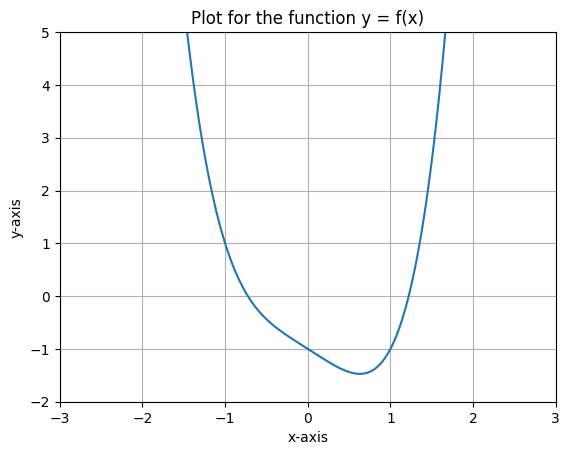

Calculation Table:



Index        Xn         F(Xn)  Xn - Xn-1      Xn+1
0      0 -2.000000  1.700000e+01        NaN -1.484811
1      1 -1.484811  5.345353e+00   0.515189 -1.105512
2      2 -1.105512  1.599179e+00   0.379299 -0.855785
3      3 -0.855785  3.921468e-01   0.249727 -0.743952
4      4 -0.743952  5.027567e-02   0.111832 -0.724956
5      5 -0.724956  1.171699e-03   0.018996 -0.724492
6      6 -0.724492  5.330315e-07   0.000464 -0.724492

Convergence plot of the root:


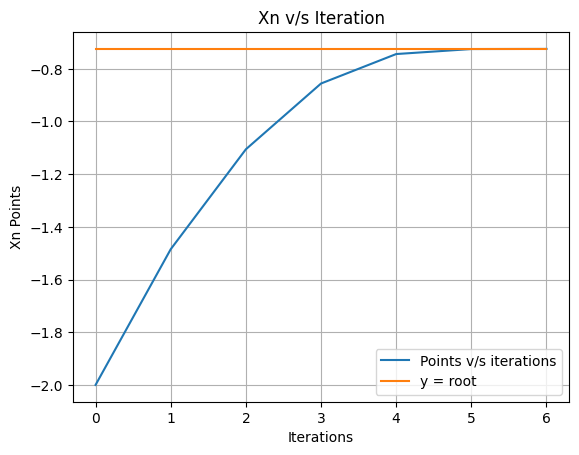


First Root = -0.72449196

Calculation Table:



Index        Xn      F(Xn)  Xn - Xn-1      Xn+1
0      0  2.000000  13.000000        NaN  1.580678
1      1  1.580678   3.662033  -0.419322  1.333227
2      2  1.333227   0.826260  -0.247450  1.235794
3      3  1.235794   0.096506  -0.097433  1.221060
4      4  1.221060   0.001987  -0.014734  1.220744
5      5  1.220744   0.000001  -0.000316  1.220744

Convergence plot of the root:


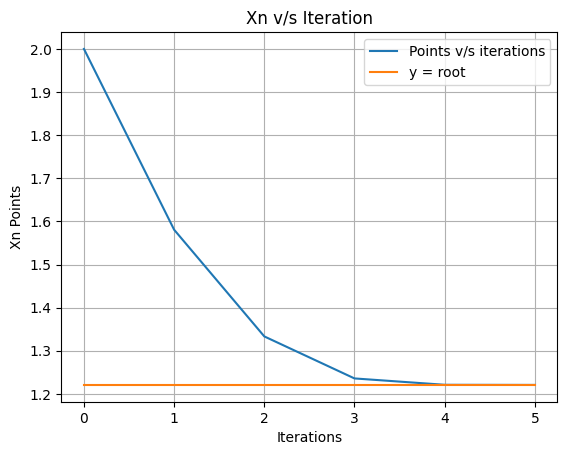


Second Root = 1.22074408


In [11]:
p = polynomial(function = lambda x: x**4 - x - 1, accuracy=0.0001)
p.plot(high=20, xlimit=(-3, 3), ylimit=(-2, 5))
root1 = p.find_roots(a=-2, method='newton')
p.converence_plot(root=root1, xlimit=(-3, 3), ylimit=(-2, 5))
print(f"\nFirst Root = {root1}\n")
root2 = p.find_roots(a=2, method='newton')
p.converence_plot(root=root2, xlimit=(-3, 3), ylimit=(-2, 5))
print(f"\nSecond Root = {root2}")

2.2 To help determine the roots of $x = tan(x)$, graph $y = x$ and $y = tan(x)$, and look at the intersection points of the two curves. Numerically test the convergence of the problem given in Question 2 in the theory exercises on the Newton-Raphson method.


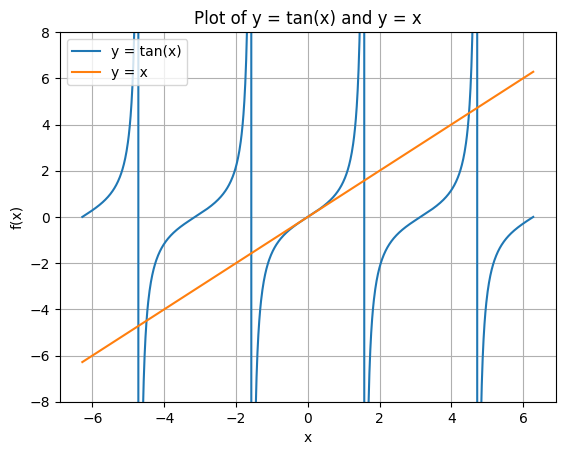

In [12]:
low, high = -2 * np.pi, 2 * np.pi
x = np.linspace(low, high, 1000)
f = np.tan(x)

plt.plot(x, f, label='y = tan(x)')
plt.plot(x, x, label='y = x')
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of y = tan(x) and y = x')
plt.grid(True)
plt.legend()
plt.show()

(a) Find the smallest nonzero positive root of $x = tan(x)$, with an accuracy of 0.0001.

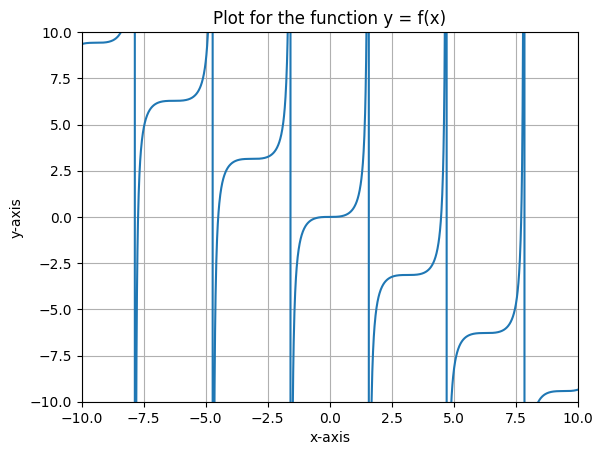

Calculation Table:



Index        Xn     F(Xn)  Xn - Xn-1      Xn+1
0      0  4.600000  4.260175        NaN  4.545781
1      1  4.545781  1.400687  -0.054219  4.506193
2      2  4.506193  0.274643  -0.039587  4.494183
3      3  4.494183  0.015683  -0.012010  4.493413
4      4  4.493413  0.000064  -0.000771  4.493409

Convergence plot of the root:


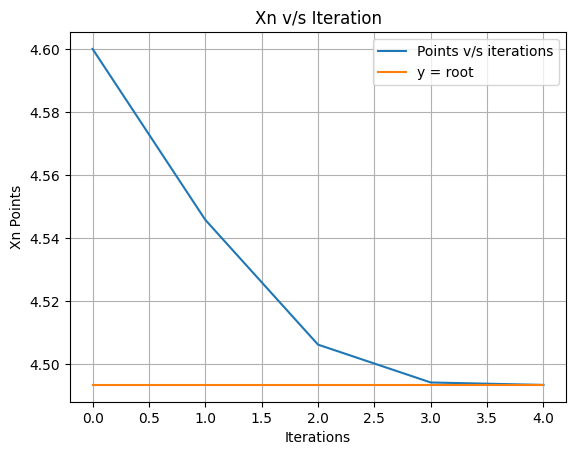


Root greater than pi/2 = 4.49340946



In [13]:
p = polynomial(function = lambda x: np.tan(x) - x, accuracy=0.0001)
p.plot(high=20, xlimit=(-10, 10), ylimit=(-10, 10))
root = p.find_roots(a=4.6, method='newton')
p.converence_plot(root=root, xlimit=(-10, 10), ylimit=(-10, 10))
print(f"\nRoot greater than pi/2 = {root}\n")

Calculation Table:



Index         Xn       F(Xn)  Xn - Xn-1       Xn+1
0      0  98.959000  756.774139        NaN  98.958055
1      1  98.958055  374.167108  -0.000945  98.956463
2      2  98.956463  170.871700  -0.001592  98.954179
3      3  98.954179   67.999217  -0.002284  98.951780
4      4  98.951780   20.256766  -0.002399  98.950372
5      5  98.950372    3.119148  -0.001408  98.950075
6      6  98.950075    0.122489  -0.000296  98.950063

Convergence plot of the root:


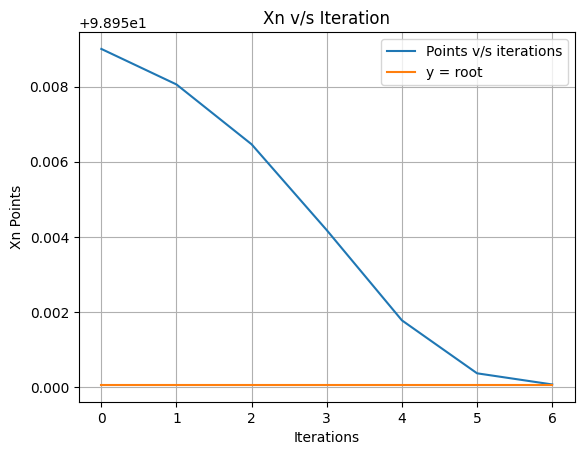


Root closest to 100 = 98.95006296


In [14]:
root = p.find_roots(a=98.959, method='newton')
p.converence_plot(root=root, xlimit=(98.5, 99.5), ylimit=(-4000, 8000))
print(f"\nRoot closest to 100 = {root}")

<h3>Question-4</h3>
<p align="justify"> The function $ y = f(x) = a+x(x−1)^{2} $, with $0 ≤ a ≤ 0.1$. When $a != 0$, there is only one real root of $f(x) = 0$, with the root being negative. Analytically check how many roots are obtained for $a = 0$, and what is the nature of the roots. Thereafter, using the Newton-Raphson method, test for the convergence towards the negative real root, through a series of suitably chosen a values going right down to $a = 0$ (the most important case). In every case your initial guess value should be slightly larger than 1, say 1.01, and slightly smaller than 1, say 0.99. For every value of a, starting from both sides of $x = 1$, check how quickly the convergence happens.

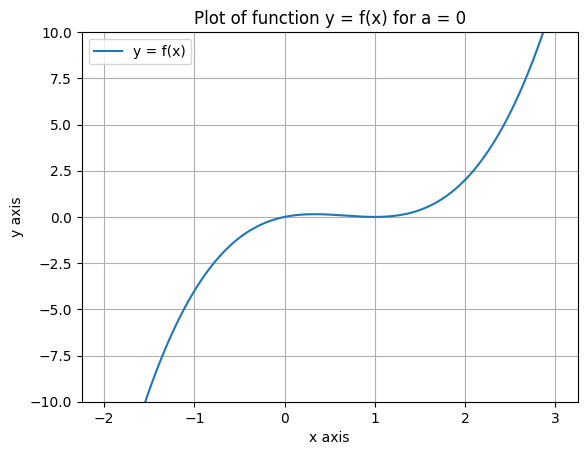

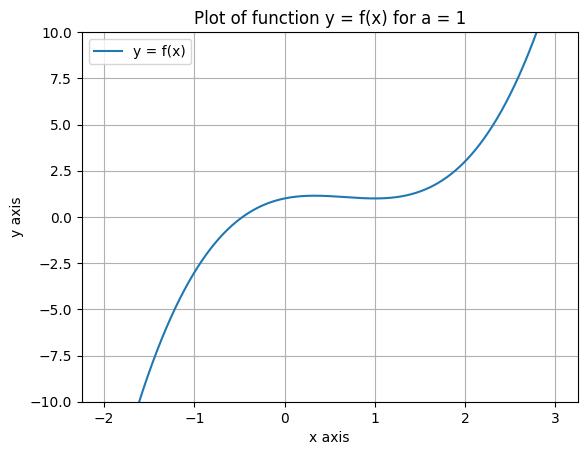

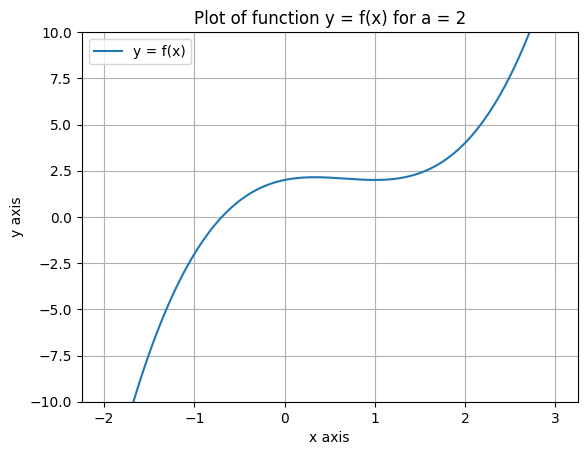

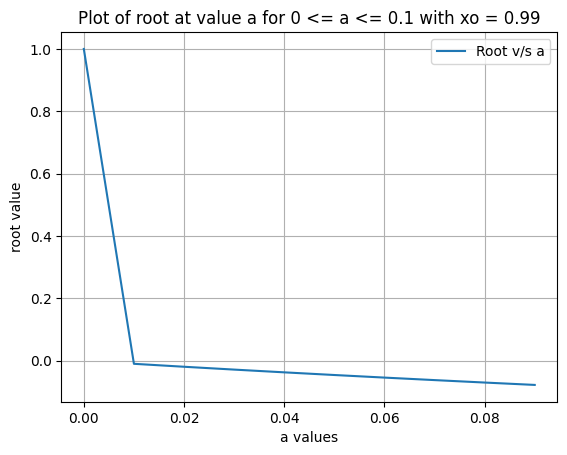

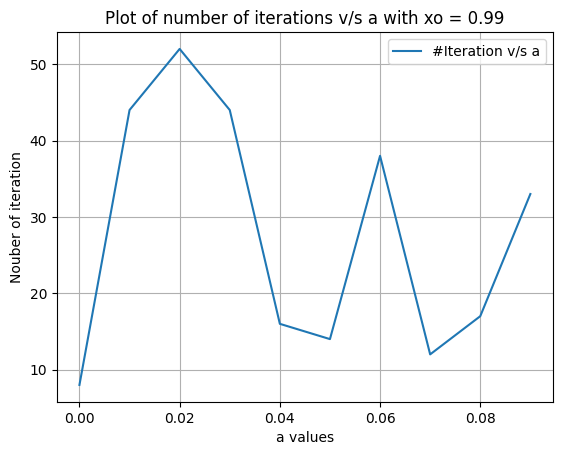

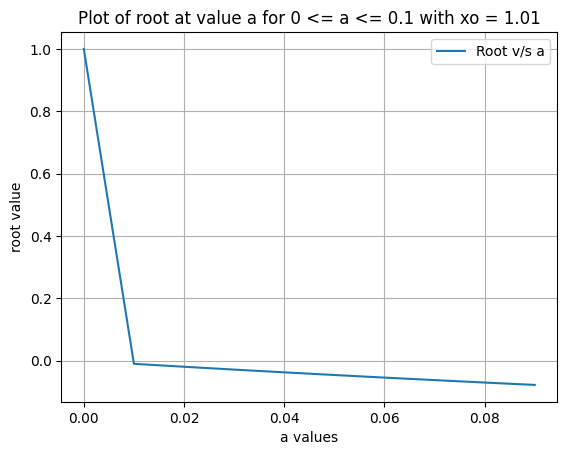

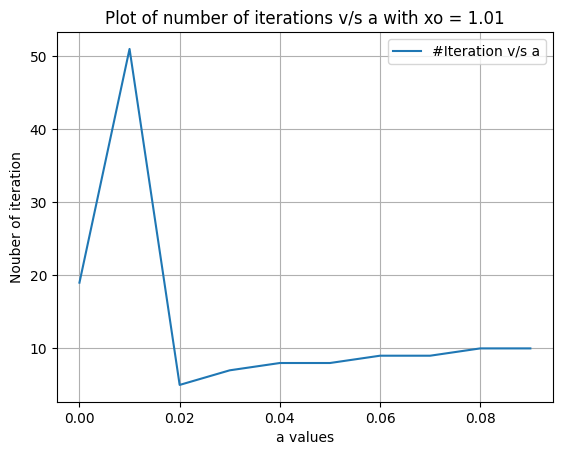

In [28]:
a_val = [0, 1, 2]
x = np.arange(-2, 3, 0.001)
for a in a_val:
    y = lambda a, x: a + x * (x-1)**2
    plt.plot(x, y(a, x), label="y = f(x)")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.ylim(-10, 10)
    plt.title(f"Plot of function y = f(x) for a = {a}")
    plt.grid()
    plt.legend()
    plt.show()

xo_values = [0.99, 1.01]
i = 0
for xo in xo_values:
    a_values = np.arange(0, 0.1, 0.01)
    roots = []
    iteration_count = []
    for a in a_values:
        p = polynomial(function = lambda x: a + x * ((x-1)**2), accuracy=0.000001)
        roots.append(p.find_roots(a=xo, method='newton', table=False))
        iteration_count.append(len(p.df.index))
    plt.figure(i)
    plt.plot(a_values, roots, label="Root v/s a")
    plt.xlabel("a values")
    plt.ylabel("root value")
    plt.title(f"Plot of root at value a for 0 <= a <= 0.1 with xo = {xo}")
    plt.grid()
    plt.legend()
    plt.show()
    i += 1
    plt.figure(i)
    plt.plot(a_values, iteration_count, label="#Iteration v/s a")
    plt.xlabel("a values")
    plt.ylabel("Nouber of iteration")
    plt.title(f"Plot of number of iterations v/s a with xo = {xo}")
    plt.grid()
    plt.legend()
    plt.show()
    i += 1